In [1]:
# importing libs
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda,Dropout
from keras.models import Model
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam,SGD
from keras import backend as K

In [2]:
# for reproducing reslut
from numpy.random import seed
seed(1)
import tensorflow 
tensorflow.random.set_seed(3)

In [3]:
# defining parameters
# define (n,k) here for (n,k) autoencoder
# n = n_channel 
# k = log2(M)  ==> so for (7,4) autoencoder n_channel = 7 and M = 2^4 = 16 
M = 256
k = 8
k = int(k)
n_channel = 8
R = k/n_channel
print ('M:',M,'k:',k,'n:',n_channel)

M: 256 k: 8 n: 8


In [4]:
#generating data of size N
N = 8000
label = np.random.randint(M,size=N)

In [5]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [6]:
# checking data shape
data = np.array(data)
print (data.shape)

(8000, 256)


In [7]:
# checking generated data with it's label
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

25 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
212 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [8]:
# defining autoencoder and it's layer
input_signal = Input(shape=(M,))
encoded = Dense(128, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = Lambda(lambda x: np.sqrt(n_channel)*K.l2_normalize(x,axis=1))(encoded1)

EbNo_train = 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)
autoencoder = Model(input_signal, decoded1)
adam = Adam(lr=0.01)
autoencoder.compile(optimizer=adam, loss='categorical_crossentropy')

C:\Users\Surya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
# printing summary of layers and it's trainable parameters 
print (autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
 lambda (Lambda)             (None, 8)                 0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 8)                0         
 se)                                                             
                                                                 
 dense_2 (Dense)             (None, 256)               2304      
                                                             

In [10]:
# for tensor board visualization
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
# traning auto encoder
autoencoder.fit(data, data,
                epochs=45,
                batch_size=32)

Epoch 1/45
250/250 [==============================] - 3s 7ms/step - loss: 1.5348
Epoch 2/45
250/250 [==============================] - 2s 7ms/step - loss: 0.3132
Epoch 3/45
250/250 [==============================] - 2s 7ms/step - loss: 0.2402
Epoch 4/45
250/250 [==============================] - 1s 6ms/step - loss: 0.2341
Epoch 5/45
250/250 [==============================] - 1s 5ms/step - loss: 0.1730
Epoch 6/45
250/250 [==============================] - 2s 7ms/step - loss: 0.1757
Epoch 7/45
250/250 [==============================] - 1s 6ms/step - loss: 0.1647
Epoch 8/45
250/250 [==============================] - 2s 7ms/step - loss: 0.1753
Epoch 9/45
250/250 [==============================] - 2s 7ms/step - loss: 0.1524
Epoch 10/45
250/250 [==============================] - 2s 6ms/step - loss: 0.1745
Epoch 11/45
250/250 [==============================] - 1s 6ms/step - loss: 0.1589
Epoch 12/45
250/250 [==============================] - 2s 7ms/step - loss: 0.1695
Epoch 13/45
250/250 [====

In [11]:
# saving keras model
from keras.models import load_model

In [12]:
encoder = Model(input_signal, encoded2)
# making decoder from full autoencoder
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)

In [13]:
# generating data for checking BER
# if you're not using t-sne for visulation than set N to 70,000 for better result 
# for t-sne use less N like N = 1500
N = 50000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)
# checking generated data
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])
# for plotting learned consteallation diagram

scatter_plot = []
for i in range(0,M):
    temp = np.zeros(M)
    temp[i] = 1
    scatter_plot.append(encoder.predict(np.expand_dims(temp,axis=0)))
scatter_plot = np.array(scatter_plot)
print (scatter_plot.shape)

1.0 177
1/1 [==============================] - 0s 35ms/step
(256, 1, 8)


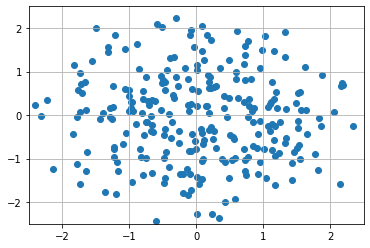

1563/1563 [==============================] - 4s 2ms/step
SNR: -4 BER: 0.81504
1563/1563 [==============================] - 4s 2ms/step
SNR: -3.5 BER: 0.7875
1563/1563 [==============================] - 4s 3ms/step
SNR: -3.0 BER: 0.7557
1563/1563 [==============================] - 4s 2ms/step
SNR: -2.5 BER: 0.72558
1563/1563 [==============================] - 4s 2ms/step
SNR: -2.0 BER: 0.68486
1563/1563 [==============================] - 4s 2ms/step
SNR: -1.5 BER: 0.64636
1563/1563 [==============================] - 4s 2ms/step
SNR: -1.0 BER: 0.60128
1563/1563 [==============================] - 4s 2ms/step
SNR: -0.5 BER: 0.55576
1563/1563 [==============================] - 4s 2ms/step
SNR: 0.0 BER: 0.50558
1563/1563 [==============================] - 4s 2ms/step
SNR: 0.5 BER: 0.45068
1563/1563 [==============================] - 4s 2ms/step
SNR: 1.0 BER: 0.40028
1563/1563 [==============================] - 4s 2ms/step
SNR: 1.5 BER: 0.35188
1563/1563 [==============================] - 4s 

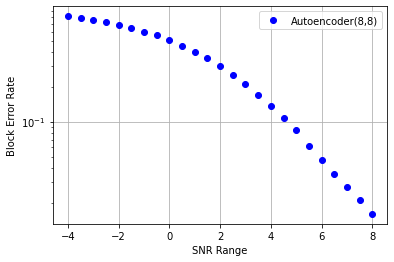

In [14]:
# ploting constellation diagram
import matplotlib.pyplot as plt
scatter_plot = scatter_plot.reshape(M,8,1)
plt.scatter(scatter_plot[:,0],scatter_plot[:,1])
plt.axis((-2.5,2.5,-2.5,2.5))
plt.grid()
plt.show()
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump
# calculating BER
# this is optimized BER function so it can handle large number of N
# previous code has another for loop which was making it slow
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])
    # use below line for generating matlab like matrix which can be copy and paste for plotting ber graph in matlab
    #print(ber[n], " ",end='')
# ploting ber curve
import matplotlib.pyplot as plt
from scipy import interpolate
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(8,8)')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
# for saving figure remove below comment
plt.savefig('AutoEncoder_8_8_constrained_BER_matplotlib')
plt.show()